# <br><br>
<center><font size='5'><b>Machine Learning for Mechanical Engineering</b></font><br><br><font size='5'><b>Final Exam</b></font><br><br></center>

<table style="border-style: hidden; border-collapse: collapse;" width = "95%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 75% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        by Prof. Seungchul Lee<br>Industrial AI Lab<br>POSTECH
        </td>
    </tr>
</table>

- For your handwritten solution, hand in your hardcopy to TA.
- For your code, email your .ipynb file to `iai.postech@gmail.com`. Only .ipynb file will be graded.
- When you send an e-mail, write down <font color="red">[Machine Learning Final]</font> on the title
- And please <font color="red">write your NAME</font> on your .ipynb files.  ex) name_20182315_Final.ipynb
- Do not submit a printed version of your code. It will not be graded.

# Problem 1

Consider two spheres $V_1$ and $V_2$ defined by two equations below.


$$V_1 : x^2 + y^2 + z^2 = 1$$
$$V_2 : (x - 1)^2 + y^2 + z^2 = 1$$

__(1)__ 
Write the code to estimate the volume of the sphere $V_1$ using Monte Carlo simulation. Compare your estimation with the analytic solution $\frac{4}{3}\pi$

In [2]:
import numpy as np

# Define variables
N = 100000 # number of samples
r = 1 # radius of the sphere

# Sample unifromly from cubic [-2,2]x[-2,2]x[-2,2]
samples = np.random.rand(N, 3)
samples = 4*samples - 2

# Compute distance between the origin and particles
dist = np.sqrt(samples[:,0]**2 + samples[:,1]**2 + samples[:,2]**2)

# Compute the probability of the particles in the sphere
rate = np.mean(dist<r)

# Compute volume V
V = 4**3*rate

print('Estimation: {}'.format(V))
print('Analytic solution: {}'.format(4/3*np.pi))

Estimation: 4.14656
Analytic solution: 4.1887902047863905


__(2)__
Write the code to estimate the volume of the intersection between the sphere $V_1$ and the $V_2$. Compare your estimation with the analytic solution $\frac{5}{12}\pi$.

In [3]:
import numpy as np

# Define variables
N = 100000 # number of samples
r = 1 # radius of the sphere

# Sample unifromly from cubic [-2,2]x[-2,2]x[-2,2]
samples = np.random.rand(N, 3)
samples = 4*samples - 2

# Compute distance between the origin and particles
dist1 = np.sqrt(samples[:,0]**2 + samples[:,1]**2 + samples[:,2]**2)
dist2 = np.sqrt((samples[:,0] - 1)**2 + samples[:,1]**2 + samples[:,2]**2)

# Compute the probability of the particles in both spheres
rate = np.mean((dist1<r)&(dist2<r))

# Compute volume V
V = 4**3*rate

print('Estimation: {}'.format(V))
print('Analytic solution: {}'.format(5/12*np.pi))

Estimation: 1.33248
Analytic solution: 1.3089969389957472


# Problem 2

Given 100 pictures of human faces with size of $(50, 40)$, we will apply PCA to this dataset. First, you can load the data using the code below.

Download this [data](https://www.dropbox.com/s/uyy3tss4m2w5qrj/problem2_data.pkl?dl=1).

__(1)__
Plot the image of a single human face among 100 pictures. (You can radomly select one of the face images)

In [5]:
from six.moves import cPickle

data = cPickle.load(open('./data_files/problem2_data.pkl', 'rb'))
print(data.shape)

(100, 50, 40)


In [6]:
import matplotlib.pyplot as plt

sample = data[3]
plt.imshow(sample, 'gray')
plt.axis('off')
plt.show()

__(2)__
Before applying PCA, we need to reshape the face images into vectorized form. Reshape the given dataset into a matrix of size $(100,50 \times 40)$. 

(_i.e._, $(100,50,40)$ $\rightarrow$ $(100,50\times 40)$)

In [7]:
re_data = data.reshape(100,-1)

__(3)__
Apply PCA to the reshaped dataset. First, you need to compute a covariance matrix. Second, you need to compute eigen vectors of its covariance matrix.

In [8]:
import numpy as np

# First, compute a covariance matrix
cov = np.cov(re_data.T)

# Second, compute eigen vectors
lamb, v = np.linalg.eig(cov)

__(4)__
Show the first eigen vector. First, you need to convert eigen vector to a real valued vector using `np.real()`. Then you need to reshape the eigen vector into image size $(50,40)$. 

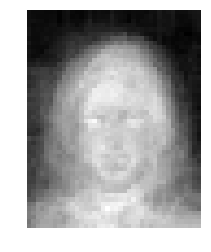

In [9]:
first_eig = v[:,0].real
plt.imshow(first_eig.reshape(50, 40), 'gray')
plt.axis('off')
plt.show()

# Problem 3

Consider the following dataset. The first column is discrete-valued random variable $y$ and the second and third columns are continuous-valued random variables $x_1$ and $x_2$.

Download this [data](https://www.dropbox.com/s/yxvhidt8p44852r/problem3_data.pkl?dl=1).

<img src="./image_files/problem2_fig.PNG" width = 200>

You can load the table using the below code. The table has totally 1000 samples as you can see from the shape.

In [11]:
from six.moves import cPickle
table = cPickle.load(open('./data_files/problem3_data.pkl', 'rb'))

print(table.shape)

(1000, 3)


__(1)__
Estimate the marginal distribution $P(y=0)$ and $P(y=1)$ using the given table.

In [12]:
import numpy as np

y_1 = np.mean(table[:,0] == 1)
y_0 = np.mean(table[:,0] == 0)

print('Probability of y=0: {}'.format(y_0))
print('Probability of y=1: {}'.format(y_1))

Probability of y=0: 0.703
Probability of y=1: 0.297


__(2)__
Plot the marginal distribution $P(x_1, x_2)$ using the given table.

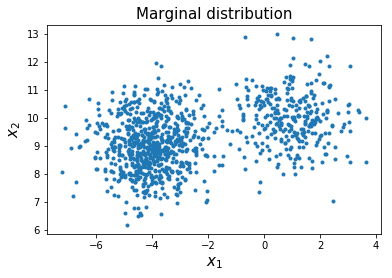

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(table[:,1], table[:,2], '.')
plt.title('Marginal distribution', fontsize=15)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis('scaled')
plt.show()

__(3)__
Plot the conditional distributions $P(x_1, x_2 \mid y=0)$ and $P(x_1, x_2 \mid y=1)$ using the given table.

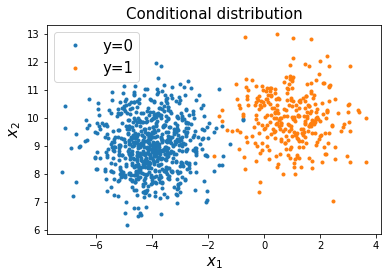

In [14]:
plt.figure(figsize=(6, 6))
plt.plot(table[table[:,0]==0,1], table[table[:,0]==0,2], '.', label='y=0')
plt.plot(table[table[:,0]==1,1], table[table[:,0]==1,2], '.', label='y=1')
plt.title('Conditional distribution', fontsize=15)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.legend(fontsize=15)
plt.axis('scaled')
plt.show()

__(4)__
Compute the conditional probability of $P(y \mid -6 \leq x_1 \leq -4 \ \text{and} \ 8 \leq x_2 \leq 11)$

In [15]:
condition = (-6 < table[:,1]) * (table[:,1] < -4) * (8 < table[:,2]) * (table[:,2] < 11)

y_1 = np.mean(table[condition,0])
y_0 = 1 - y_1

print('Probability of y=0: {}'.format(y_0))
print('Probability of y=1: {}'.format(y_1))

Probability of y=0: 1.0
Probability of y=1: 0.0


# Problem 4

Let's assume the probability of having cancer is 0.1. When a human has a cancer, the probability of having a tumor in his body is 0.9. Also, when a human doesn't have a cancer, the probaility of having a tumor in his body is 0.7. One day, Sam goes to a hospital and his doctor finds a tumor in his body.  In this case, would you believe Sam has a cancer? Please describe the reason in a logical way.

# Problem 5

[10pt] Middle East Respiratory Syndrome (MERS) outbreaked in South Korea, which caused extremely serious problems to almost every corner of our societies. Read the following conversation regarding MERS.

__A__: All the media in Korea talk about MERS nowadays. It is getting more serious. I do not think that Pohang is a safe place any more. I think I should go and get some masks to be protected from MERS. Do you want to go with me? 

__B__: Mask? Are you kidding? On the hottest day like today? I do not want to wear a mask. By the way, I remember that the World Health Organization said "the risk of sustained person-to-person transmission appears to be very low." 

__A__: I know that, but I am afraid that there is potential danger in that it is possible for the virus to mutate into a strain that does transmit from person to person. I believe that more evidences that support this are coming on the news. Look at this news article!   

__B__: I also heard those news from TV. However, some are just rumors!!! Anyway, I am not going with you.  


From the above conversations between __A__ and __B__, we can find out that they behave differently although they have had the similar amount of information and heard similar news. Explain why they end up drawing different conclusions using the concept of MAP.

<br>
$$\theta_{\text{MAP}} = \frac{m}{m+\sigma^2} \bar x + \frac{\sigma^2}{m+\sigma^2} \mu$$

# Problem 6

1) Explain why the perceptron cannot solve the XOR problem.

2) ANN (Artificial Neural Networks) is also called as MLP (Multilayer Perceptron). Explain why the MLP is able to solve the XOR problem.

3) We learned three different non-linear activation fuctions in class. Explain why the unit step function (or sign fuction) is not used for a non-linear activation function in ANN. 

4) Explain why the autoencoder is one of unsupervised learning algorithms.

5) Explain how the autoencoder can work as a feature extraction.

6) We have learned two methods for the dimension reduction: PCA and Autoencoder. Explain briefly when you think the autoencoder is acting (or working) like the PCA.

7) Explain how the CNN can do the image pattern recognition with the fixed size of kernels although the object size on images might be different.

# Problem 7

Download this data. [pet_data](https://www.dropbox.com/sh/98okq7x6g1ppts3/AACuSKgYpxuhwVhO9_h4VJTxa?dl=1)


(1) CNN for the cat and dog classification.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from six.moves import cPickle

c:\users\namjeong\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#load data
train_img = cPickle.load(open('./data_files/train_img_gray.pkl', 'rb'))
train_label = cPickle.load(open('./data_files/train_label_gray.pkl', 'rb'))

test_img = cPickle.load(open('./data_files/test_img_gray.pkl', 'rb'))
test_label = cPickle.load(open('./data_files/test_label_gray.pkl', 'rb'))

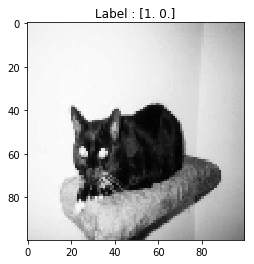

In [3]:
idx = np.random.randint(len(train_img))
plt.imshow(train_img[idx], 'gray')
plt.title('Label : {}'.format(train_label[idx]))
plt.show()

In [4]:
input_h  = 100 # Input height
input_w = 100 # Input width
input_ch = 1 # Input channel

## First convolution layer
# Filter size
k1_h = 4
k1_w = 4
# the number of channels
k1_ch = 8
# Pooling size
p1_h = 5
p1_w = 5

## Second convolution layer
# Filter size
k2_h = 2
k2_w = 2
# the number of channels
k2_ch = 16
# Pooling size
p2_h = 4
p2_w = 4

## Fully connected
# Flatten the features
conv_result_size = int((100/(5*4)) * (100/(5*4)) * k2_ch)
n_hidden1 = 100
n_output = 2

In [5]:
weights = {
    'conv1' : tf.Variable(tf.random_normal([k1_h, k1_w, input_ch, k1_ch],stddev = 0.1)),
    'conv2' : tf.Variable(tf.random_normal([k2_h, k2_w, k1_ch, k2_ch],stddev = 0.1)),
    'hidden1' : tf.Variable(tf.random_normal([conv_result_size, n_hidden1], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_hidden1, n_output], stddev = 0.1))
}

biases = {
    'conv1' : tf.Variable(tf.random_normal([k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random_normal([k2_ch], stddev = 0.1)),
    'hidden1' : tf.Variable(tf.random_normal([n_hidden1], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1))
}

x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch])
y = tf.placeholder(tf.float32, [None, n_output])

In [6]:
def net(x, weights, biases):
    ## First convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1'], 
                         strides= [1, 1, 1, 1], 
                         padding = 'SAME')
    conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, 
                           ksize = [1, p1_h, p1_w, 1], 
                           strides = [1, p1_h, p1_w, 1], 
                           padding = 'VALID'
                           )
    
    ## Second convolution layer
    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], 
                         strides= [1, 1, 1, 1], 
                         padding = 'SAME')
    conv2 = tf.nn.relu(tf.add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, 
                           ksize = [1, p2_h, p2_w, 1], 
                           strides = [1, p2_h, p2_w, 1], 
                           padding = 'VALID')

    # shape = conv2.get_shape().as_list()
    # maxp2_re = tf.reshape(conv2, [-1, shape[1]*shape[2]*shape[3]])
    maxp2_re = tf.reshape(maxp2, [-1, conv_result_size])
    
    ### Fully connected
    hidden1 = tf.add(tf.matmul(maxp2_re, weights['hidden1']), biases['hidden1'])
    hidden1 = tf.nn.relu(hidden1)
    output = tf.add(tf.matmul(hidden1, weights['output']), biases['output'])
    return output

In [7]:
LR = 0.0001

pred = net(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred)
loss = tf.reduce_mean(loss)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optm = tf.train.AdamOptimizer(LR).minimize(loss)

init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [8]:
n_batch = 50
n_iter = 2500
n_prt = 250

In [9]:
sess = tf.Session()
sess.run(init)

In [10]:
# Training cycle
for epoch in range(n_iter):
    idx = np.random.randint(len(train_label), size=n_batch)
    train_x = [train_img[i] for i in idx]
    train_y = [train_label[i] for i in idx]
    train_x = np.reshape(np.array(train_x),(-1,100,100,1)) 
    sess.run(optm, feed_dict={x: train_x,  y: train_y})
    
    if epoch % n_prt == 0:
        c = sess.run(loss, feed_dict={x: train_x, y: train_y})
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))

Iter : 0
Cost : 13.400984764099121
Iter : 250
Cost : 1.2719180583953857
Iter : 500
Cost : 0.6830869317054749
Iter : 750
Cost : 1.0553808212280273
Iter : 1000
Cost : 0.8241110444068909
Iter : 1250
Cost : 0.7989736795425415
Iter : 1500
Cost : 0.5763419270515442
Iter : 1750
Cost : 0.9211671352386475
Iter : 2000
Cost : 0.6135859489440918
Iter : 2250
Cost : 0.589694619178772


In [13]:
size = 100
idx = np.random.randint(len(test_label), size=size)
test_x = [test_img[i] for i in idx]
test_y = [test_label[i] for i in idx]

my_pred = sess.run(pred, feed_dict={x : np.array(test_x).reshape(-1,100,100,1)})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}%".format(accr*100))

Accuracy : 77.0%


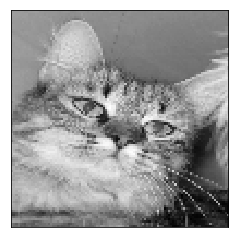

Label : 0
Prediction : 0


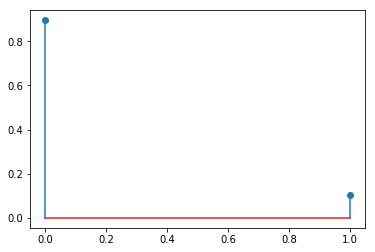

Probability : [0.9 0.1]


In [12]:
size = 1
idx = np.random.randint(len(test_label), size=size)
test_x = [test_img[i] for i in idx]
test_y = [test_label[i] for i in idx]
logits = sess.run(tf.nn.softmax(pred), feed_dict={x : np.array(test_x).reshape(-1,100,100,1)})
predict = np.argmax(logits)

plt.imshow(test_x[0], 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

print('Label : {}'.format(np.argmax(test_y[0])))
print('Prediction : {}'.format(predict))

plt.stem(logits.ravel())
plt.show()

np.set_printoptions(precision=2, suppress=True)
print('Probability : {}'.format(logits.ravel()))

(2) ANN for the cat and dog classification.